In [ ]:
# Python Project 2 - an exploration of PH data

# goal is to analyze diabetes data

# pick a group as initial comparison point
# pick a feature/measure/indicator
# compare group to any other group. only need to do one additional comparison
# should include descriptive statistics
# should have alteast one cleaning task
# should include 1 visualization
# should include a brief conclusion statement - 2-3 sent.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [3]:
# Check out dataset

df.head() 
# 5 x 50 columns
# At first glance, weight is filled with "?"s.

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Let's start cleaning first!

missing = ["n/a", "na", "--", " "]

df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv',na_values = missing)

df = df.drop_duplicates()

In [5]:
for col in df.columns:
    print(col)

encounter_id
patient_nbr
race
gender
age
weight
admission_type_id
discharge_disposition_id
admission_source_id
time_in_hospital
payer_code
medical_specialty
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
diag_1
diag_2
diag_3
number_diagnoses
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed
readmitted


In [6]:
weight_freq = df['weight'].value_counts()
print(weight_freq)

# Weight is very missing. Dropping it!

df = df.drop(['weight'],axis = 1)

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64


In [7]:
df.head() # check how it looks now!
# noticed payer_code is also filled with ? marks.

payer_freq = df['payer_code'].value_counts()
print(payer_freq)

# dataset looks about 100k rows, and 40k is missing with ?s.
# i will drop but i wonder if thre's a threshold statistically that would guide you to include/drop fields based on % missing

df = df.drop(['payer_code'],axis = 1)

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64


In [8]:
 df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [9]:
race_freq = df['race'].value_counts()
print(race_freq)

# it appears to be mostly populated (only 2,273 ?s)

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


In [10]:
gender_freq = df['gender'].value_counts()
print(gender_freq)
# Scoping out gender. only 3 missing values! Appears about 54% female, the rest male.

age_freq = df['age'].value_counts()
print(age_freq)
# Scoping out age, seems the population skews older. Confirming next!

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


Text(0.5, 1.0, 'Age Distribution by Gender')

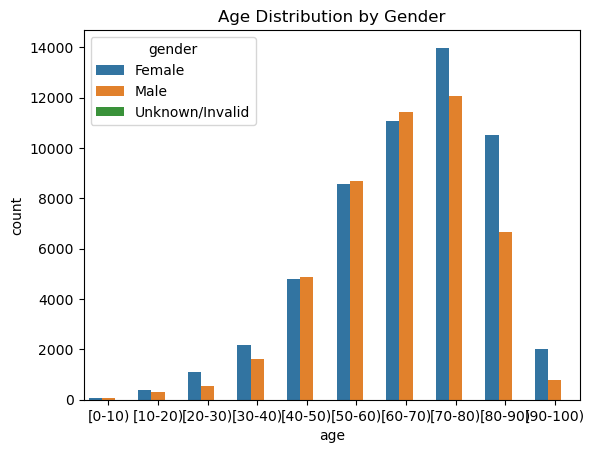

In [11]:
sns.countplot(x='age', data=df, hue = 'gender')
plt.title("Age Distribution by Gender")

# This reflects that the population skews older, with the greatest amount of members in the 70-80 age group. 
# Prior to 70/80, it appears that there are a few more males in each age group, while in the older age groups, there are more
# females. I wonder if this is proving the old tale that women last longer!

Text(0.5, 1.0, 'Length of Stay by Race')

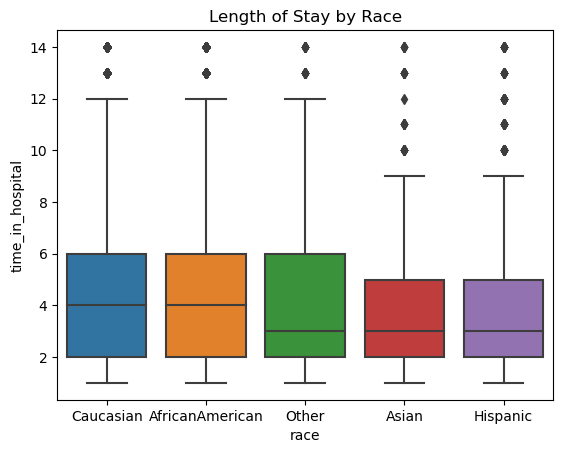

In [21]:
# Okay for this project, let's compare how long Causasian members stay in hospitals compared to African Americans/other races.
# Across all age groups.

# Group of focus = Caucasian
# Measure = time_in_hospital

# Comparison group = AA/other races.

filtered_df = df[df['race'] != '?']
sns.boxplot(x = 'race', y='time_in_hospital', data = filtered_df)

plt.title('Length of Stay by Race')

# As a population whole, they seem very similar. Good in terms of equity but boring.

Text(0.5, 1.0, 'Length of Stay by Race for People between 70 and 80')

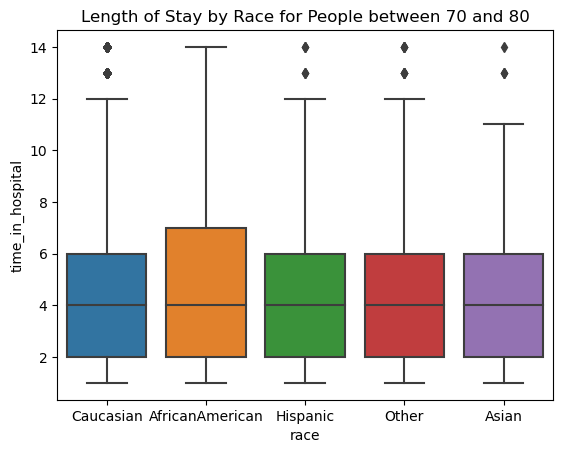

In [31]:
# Let's see if there's any variation by age groups.
df_70 = filtered_df.loc[filtered_df['age'] == "[70-80)"]

sns.boxplot(x = 'race', y='time_in_hospital', data = df_70)

plt.title('Length of Stay by Race for People between 70 and 80')

# Finally, interesting. It seems for African American members in the 70-80 age group, while they have the same median length of
# stay, there's a greater range of LOS. The box is also greater for AA members, representing greater variablity in the median
# 50% of the group.

Text(0.5, 1.0, 'Length of Stay by Race for People between 60 and 70')

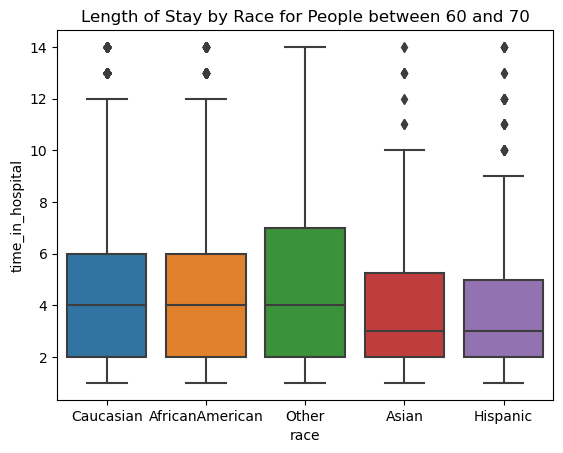

In [33]:
# Let's see if there's any variation by age groups.
df_60 = filtered_df.loc[filtered_df['age'] == "[60-70)"]

sns.boxplot(x = 'race', y='time_in_hospital', data = df_60)

plt.title('Length of Stay by Race for People between 60 and 70')

# For this age group, it appesr that members who were categroized as 'Other Race' had the greatest variablity in the LOS.
# Additionally, it appears Asian and Hispanic members both have shorter LOS compared to the other ethnicities.
# I will caveat though as we stratify by race and age, the groups get smaller and have too small N's to be statistically 
# signficant.


Text(0.5, 1.0, 'Length of Stay by Gender for Caucasian Members')

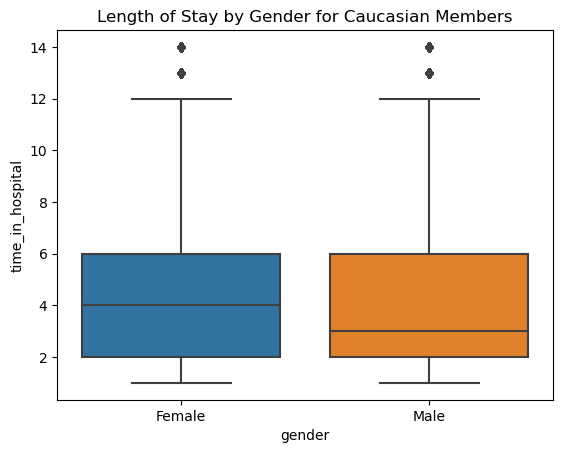

In [35]:
white_df = filtered_df.loc[filtered_df['race'] == "Caucasian"]

sns.boxplot(x = 'gender', y='time_in_hospital', data = white_df)

plt.title('Length of Stay by Gender for Caucasian Members')

# Switching things up, here the overall boxplots have similar distributions. THe main point of difference is that females
# tends to have a higher median LOS compared to men. This is across all age groups.


Text(0.5, 1.0, 'Length of Stay by Gender for AA Members')

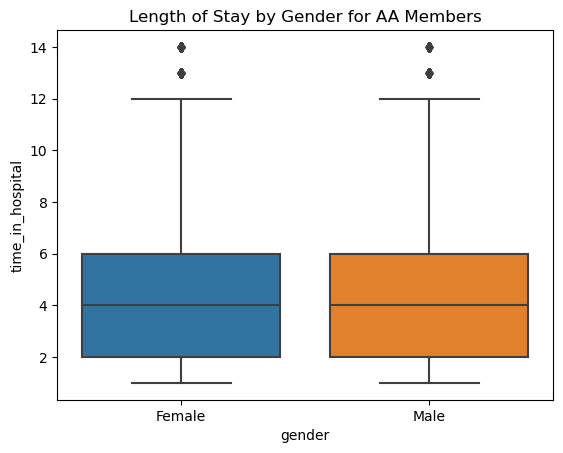

In [37]:
aa_df = filtered_df.loc[filtered_df['race'] == "AfricanAmerican"]

sns.boxplot(x = 'gender', y='time_in_hospital', data = aa_df)

plt.title('Length of Stay by Gender for AA Members')

# Compared to white members, African Members have more similar LOS across genders. They have similar distributions, IQR ranges,
# and median values.

In [ ]:
# To conclude, this mini project was interesting. We first saw that the entire dataset was about 100k rows long, 
# slightly female dominant, skewed older (with the greatest proportion of members falling in the 70-80 age group), 
# and was primarily Caucasian (approx 80%). There were some variables filtered out due to significant missing-ness (weight, payer)

# Here, we learned that as a whole, patients/members had similar length of stay distributions, regardless of race. (95% of 
# the members were white or AA, so the smaller groups had more variation and may not be significant.)
# When further stratifying by age groups, it appeared that there was some variation - African American members in
# the 70-80 range appeared to have the greatest median and variation in LOS compared to other races, while
# in the 60-70 age group, members considered 'Other Race' had the greatest variation.

# Looking at gender, it apepras that there are differences by gender. For white members, they had similar IQR ranges but 
# females tended to have a higher median LOS comapred to men. There were little to no difference in that distribution for AA members.